<div align=center style="line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<h1>
یونیدرو
</h1>
</p>
</div>






<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
آشنایی با نقشه حرارتی (heatmap)
</h2>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: right;">
نقشه حرارتی روشی برای نمایش داده‌ها در امور تحلیل داده‌ای می‌باشد که در آن رنگ‌ها متناسب با بزرگی و کوچکی اعداد تغییر می‌کنند. در نقشه‌های حرارتی از یک تابع نگاشت رنگ (color map) برای نگاشت اعداد به رنگ‌ها استفاده می‌شود. نقشه حرارتی کاربرد‌های بسیاری دارد و در حوزه های مختلفی می‌توان برای نمایش اطلاعات از آن استفاده کرد. محققان داده معمولا هنگامی که می‌خواهد نتایج کار را به شکلی قابل فهم به افراد غیر متخصص نشان دهند از نقشه حرارتی استفاده می‌کند. فرض کنید یک مجموعه داده بزرگ دارید و رابطه همه ستون‌ها را با هم به صورت یک به یک محاسبه کرده‌اید. اگر بخواهید نتایج به دست آمده را به فرد دیگری نشان دهید، ارائه همه اعداد راه‌ حل درستی نمی‌باشد. به جای آن می توان یک نقشه حرارتی ایجاد کرد که با یک نگاه به آن، خیلی سریع متغیر‌های به هم وابسته شناسایی می‌شوند چون رنگ آنها متفاوت است. در این تمرین با استفاده از نقشه حرارتی رابطه بین عناصر مختلف در این مجموعه داده را مشخص می‌کنیم.
</p>
</div>


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: right;">
نگاهی به دیتافریم بیندازیم:</p>
</div>

In [14]:
df = pd.read_csv('unidro_data.csv')
df.head()

,Au8,Au8_CN,Au,Ag,Al,As,B,Ba,Ca,Ce,...,P,Pb,S,Sb,Sr,Th,Ti,V,Y,Zn
0,0.67,32.40,2.068,1.7,5300,649,12,205,300,97,...,900,1227,27600,592,16,22,18,10,21,388
1,0.08,8.82,0.907,0.8,6900,451,13,345,400,103,...,1180,251,17600,237,20,22,19,9,18,567
2,0.04,6.80,0.588,0.9,6900,1007,17,210,400,98,...,990,121,17700,317,18,22,22,10,17,552
3,0.55,7.00,7.855,1.1,10600,19627,13,140,500,94,...,1240,158,37300,1454,25,24,22,18,21,5965
4,0.15,20.60,0.728,21.3,7900,5776,14,123,1800,75,...,1430,17270,69700,582,28,19,20,10,20,1394



<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: right;">
دیتافریم این تمرین، از اطلاعات واقعی عناصر و عیار آنها که شرکت یونیدرو از آنها استفاده می‌کند، به دست آمده است. در صنایع معدن، نمونه‌های یک گرمی را با دستگاهی به نام ICP-OES مورد بررسی قرار می‌دهند و دستگاه، غلظت عناصر موجود در آن نمونه یک گرمی را به ما می‌دهد. واحد غلظت، ppm (part per million) می‌باشد. در این دیتافریم، ۱۲۲۶ نمونه یک گرمی مورد بررسی قرار گرفته‌اند و غلظت عناصر مورد نظر ما (۳۱ عنصر)، به دست آمده‌اند. در این تمرین، می‌خواهیم بررسی کنیم که آیا رابطه معناداری بین عیار عناصر وجود دارد یا خیر. یعنی با افزایش یک عنصر در یک نمونه، چه عناصری کاهش یا افزایش می‌یابند.

</p>
</div>

In [15]:
df.shape

(1226, 31)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
بخش اول
</h2>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: right;">
ماتریس ارتباط (correlation)  بین ستون‌های این دیتافریم را به دست آورید.
</p>
</div>




In [16]:
corr_matrix = df.corr()
# corr_matrix = # to do


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
بخش دوم
</h2>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: right;">
<ul style="direction: rtl;text-align: right;">
  <li>
با مت‌پلات، یک شکل شامل یک صفحه محور بسازید و اندازه طول و عرض آن را به ترتیب برابر ۱۲ و ۱۰ اینچ قرار دهید.
</li>

  <li>
با استفاده از تابع <code>heatmap</code> سیبورن، بر روی صفحه محوری که در بخش قبل ساختید، یک نقشه حرارتی بکشید. ماتریس رابطه‌ای که در قدم اول به دست آمد را به آن بدهید. همچنین از نگاشت رنگ <code>viridis</code> استفاده کنید.

</li>
</ul>
</p>
</div>

Text(0.5, 1.0, 'correlation heatmap')

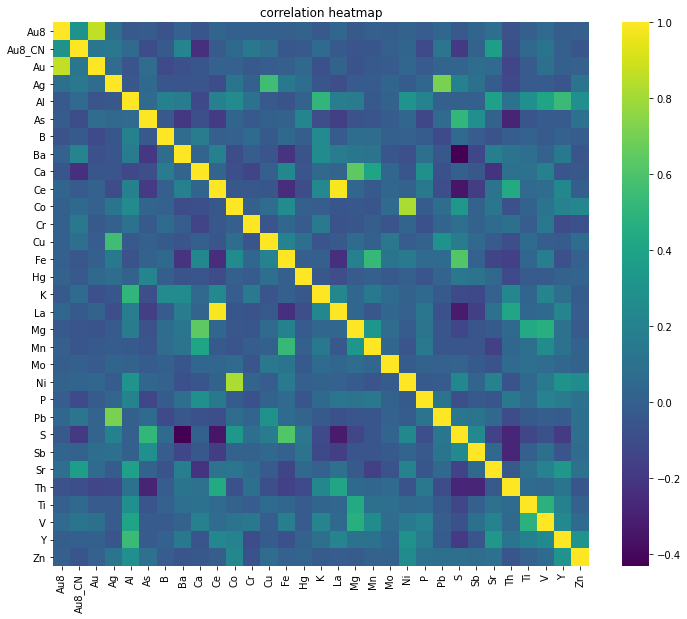

In [17]:

fig1, ax1 = plt.subplots(figsize = (12,10))

sns.heatmap(ax = ax1, data = df.corr(),cmap = 'viridis')
ax1.set_title('correlation heatmap')

# fig1, ax1 = # to do


<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: right;">
اگر با دقت به خروجی قدم دوم نگاه کنید، می‌بینید که این شکل متقارن است. به این دلیل که رابطه ویژگی x و y با رابطه ویژگی y و x برابر است. یعنی هر مقدار دو بار حساب شده است و ماتریس از روی قطر متقارن است.

</p>
</div>



<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
بخش سوم
</h2>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: right;">
ماسک، آرایه‌ای است که اجزای آن فقط صفر و یک (یا True و False) می‌باشند. نمونه‌هایی از ماسک را در فصل نامپای و پانداس دیدید.
در این قسمت می‌خواهیم یک ماسک بسازیم و از آن برای نمایش مثلث پایینی نقشه حرارتی استفاده کنیم.
<br>

<ul style="direction: rtl;text-align: right;">
  <li>
با استفاده از نامپای، ماسکی بسازید که مثلث پایینی آن (درایه‌های زیر قطر) مقدار صفر باشد و خانه‌های بالای قطر(و خود قطر)، مقدار یک داشته باشد.
</li>

  <li>
این ماسک باید ۳۱ سطر و ۳۱ ستون داشته باشد.</li>
</ul>

</p>
</div>

In [18]:
import numpy as np
my_mask = np.zeros_like(corr_matrix)
my_mask[np.triu_indices_from(my_mask)] = 1
# my_mask = # to do


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
بخش چهارم
</h2>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: right;">
<ul style="direction: rtl;text-align: right;">
  <li>
با مت‌پلات، یک شکل شامل یک صفحه محور بسازید و اندازه طول و عرض آن را به ترتیب برابر ۱۲ و ۱۰ اینچ قرار دهید.
</li>

  <li>
با استفاده از تابع <code>heatmap</code> سیبورن، بر روی صفحه محوری که در بخش قبل ساختید، یک نقشه حرارتی بکشید. ماتریس رابطه‌ای که در قدم اول به دست آمد را به آن بدهید. این‌بار از نگاشت رنگ <code>jet</code> استفاده کنید.

</li>

  <li>
ماسکی که در بخش قبل ساختید را در آرگومان <code>mask</code> به تابع <code>heatmap</code> بدهید تا فقط قسمت پایینی نقشه حرارتی رسم شود. خانه‌هایی که مقدار <code>mask</code> آنها برابر یک می‌باشد، رسم نمی‌شوند.

</li>
</ul>
</p>
</div>

Text(0.5, 1.0, 'correlation heatmap lower triangular')

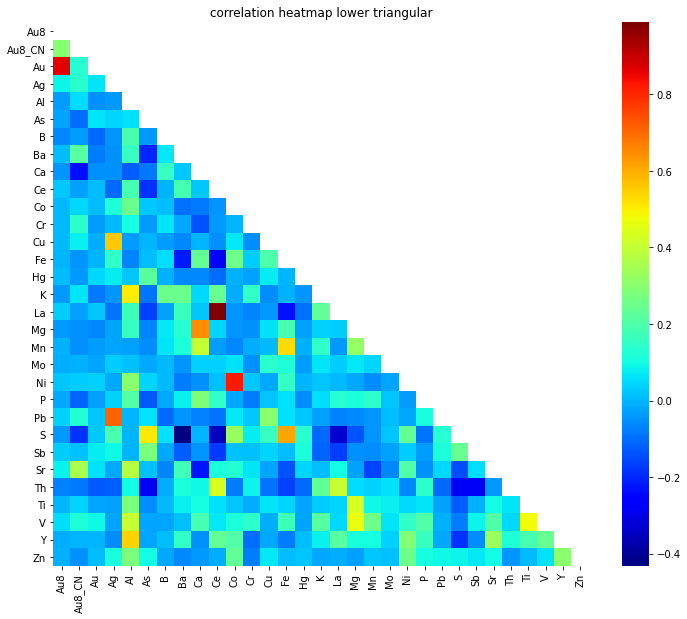

In [19]:
fig2, ax2 = plt.subplots(figsize = (12,10))
sns.heatmap(ax = ax2, data = df.corr(), cmap = 'jet', mask = my_mask)
ax2.set_title('correlation heatmap lower triangular')

# fig2, ax2 = # to do


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
توابع نگاشت رنگ
</h2>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: right;">
در این تمرین از دو تابع نگاشت رنگ استفاده کردید. انتخاب نگاشت رنگ متناسب با نیاز ما و نوع مسئله  مشخص می‌شود. هر تابع نگاشت رنگ اعداد را به طیف مخصوصی از رنگ‌ها نگاشت می‌کند. این طیف می‌تواند شامل یک، دو یا حتی همه رنگ‌ها باشد. مت‌پلات توابع نگاشت رنگ متنوعی دارد که در
 <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html
">این لینک </a>
  می‌توانید با آنها آشنا شوید.
</p>
</div>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
سلول جواب‌ساز
</h2>

In [20]:

import zlib
import zipfile
import joblib

joblib.dump(fig2,"fig2")
joblib.dump(fig1,"fig1")
joblib.dump(corr_matrix,"corr_matrix")
joblib.dump(my_mask,"my_mask")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["fig2","fig1","corr_matrix","my_mask", "unidro_solution.ipynb"]
compress(file_names)